# SETUP/DATA WRANGLING

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [18]:
pd.set_option("display.max_rows", None,'display.max_columns', None, 'display.width', 1000)
df = pd.read_csv("wireshark1.csv", index_col='No.')

In [19]:
#Data Wrangling
df.loc[df['Protocol'] == 'ARP', 'ProtocolNumber'] = '1'
df.loc[df['Protocol'] == 'UDP', 'ProtocolNumber'] = '2'
df.loc[df['Protocol'] == 'SSDP', 'ProtocolNumber'] = '3'
df.loc[df['Protocol'] == 'IGMPv3', 'ProtocolNumber'] = '4'
df.loc[df['Protocol'] == 'DHCPv6', 'ProtocolNumber'] = '5'
df.loc[df['Protocol'] == 'DNS', 'ProtocolNumber'] = '6'
df.loc[df['Protocol'] == 'HTTP', 'ProtocolNumber'] = '7'
df.loc[df['Protocol'] == 'ICMP', 'ProtocolNumber'] = '8'
df.loc[df['Protocol'] == 'ICMPv6', 'ProtocolNumber'] = '9'
df.loc[df['Protocol'] == 'TCP', 'ProtocolNumber'] = '10'
df.loc[df['Protocol'] == 'LLMNR', 'ProtocolNumber'] = '11'
df.loc[df['Protocol'] == 'MDNS', 'ProtocolNumber'] = '12'
df.loc[df['Protocol'] == 'NTP', 'ProtocolNumber'] = '13'
df.loc[df['Protocol'] == 'XID', 'ProtocolNumber'] = '14'
df.loc[df['Protocol'] == 'BROWSER', 'ProtocolNumber'] = '15'
df.loc[df['Protocol'] == 'NBNS', 'ProtocolNumber'] = '16'


#Assigning each Source IP a ID
df['id'] = df.groupby('Source').ngroup()

#Changing SPort and DPort NaN Values to 0
df['SPort'] = df['SPort'].fillna(0)
df['DPort'] = df['DPort'].fillna(0)

#Converting Values to Int to remove decimal place
df['SPort'] = df['SPort'].astype(int)
df['DPort'] = df['DPort'].astype(int)





#Creating column total requests
df['Totalrequests'] = df.groupby('Source')['Source'].transform('count')
#Assigning dfdos to df
dfdos = df
#Removing Unnecessary data for DOS
dfdos.drop(dfdos.loc[dfdos['Source']=='192.168.0.117'].index, inplace=True)
dfdos.drop(dfdos.loc[dfdos['Source']=='192.168.0.218'].index, inplace=True)
dfdos = dfdos.reset_index(drop=True)
dfdos


Time                                  Source            Destination Protocol  Length                                                                                                 Info      TimeDiff  SPort  DPort ProtocolNumber   id  Totalrequests
0       0.000000                       PcsCompu_bd:40:f6              Broadcast      ARP      42                                                            Who has 192.168.0.148? Tell 192.168.0.218  0.000000e+00      0      0              1  215           1174
1       0.003882                       PcsCompu_bd:40:f6              Broadcast      ARP      42                                                             Who has 192.168.0.59? Tell 192.168.0.218  3.881685e-03      0      0              1  215           1174
2       0.022357                   DESKTOP-GSL42P0.local          192.168.0.255      UDP     305                                                                              54915  >  54915 Len=263  1.847526e-02  54915  54915              2  211            466
3       0.025986                            192.168.0.68          192.168.0.218      TCP      60                                                              23721  >  80 [SYN] Seq=0 Win=8192 Len=0  3.629469e-03  23721     80             10  180              3
4       0.026002                       PcsCompu_bd:40:f6              Broadcast      ARP      42                                                             Who has 192.168.0.68? Tell 192.168.0.218  1.524500e-05      0      0              1  215           1174
5       0.061133                            192.168.0.89          192.168.0.218      UDP      60                                                                                   37068  >  80 Len=0  3.513118e-02  37068     80              2  199              1
6       0.061151                       PcsCompu_bd:40:f6              Broadcast      ARP      42                                                             Who has 192.168.0.89? Tell 192.168.0.218  1.843400e-05      0      0              1  215           1174
7       1.023574                       PcsCompu_bd:40:f6              Broadcast      ARP      42                                                            Who has 192.168.0.148? Tell 192.168.0.218  9.624223e-01      0      0              1  215           1174
8       1.023599                   DESKTOP-GSL42P0.local          192.168.0.255      UDP     305                                                                              54915  >  54915 Len=263  2.518400e-05  54915  54915              2  211            466
9       1.055938                       PcsCompu_bd:40:f6              Broadcast      ARP      42                                                             Who has 192.168.0.68? Tell 192.168.0.218  3.233902e-02      0      0              1  215           1174
10      1.088145                       PcsCompu_bd:40:f6              Broadcast      ARP      42                                                             Who has 192.168.0.89? Tell 192.168.0.218  3.220706e-02      0      0              1  215           1174
11      1.092761                           192.168.0.120          192.168.0.218      TCP      60                                                              48903  >  80 [SYN] Seq=0 Win=8192 Len=0  4.616368e-03  48903     80             10   20              3
12      1.092776                       PcsCompu_bd:40:f6              Broadcast      ARP      42                                                            Who has 192.168.0.120? Tell 192.168.0.218  1.443600e-05      0      0              1  215           1174
13      1.124921                             192.168.0.2          192.168.0.218      UDP      60                                                                                   40305  >  80 Len=0  3.214573e-02  40305     80              2   90              2
14      1.124941                       PcsCompu_bd:40:f6              Broadcast      ARP      42 

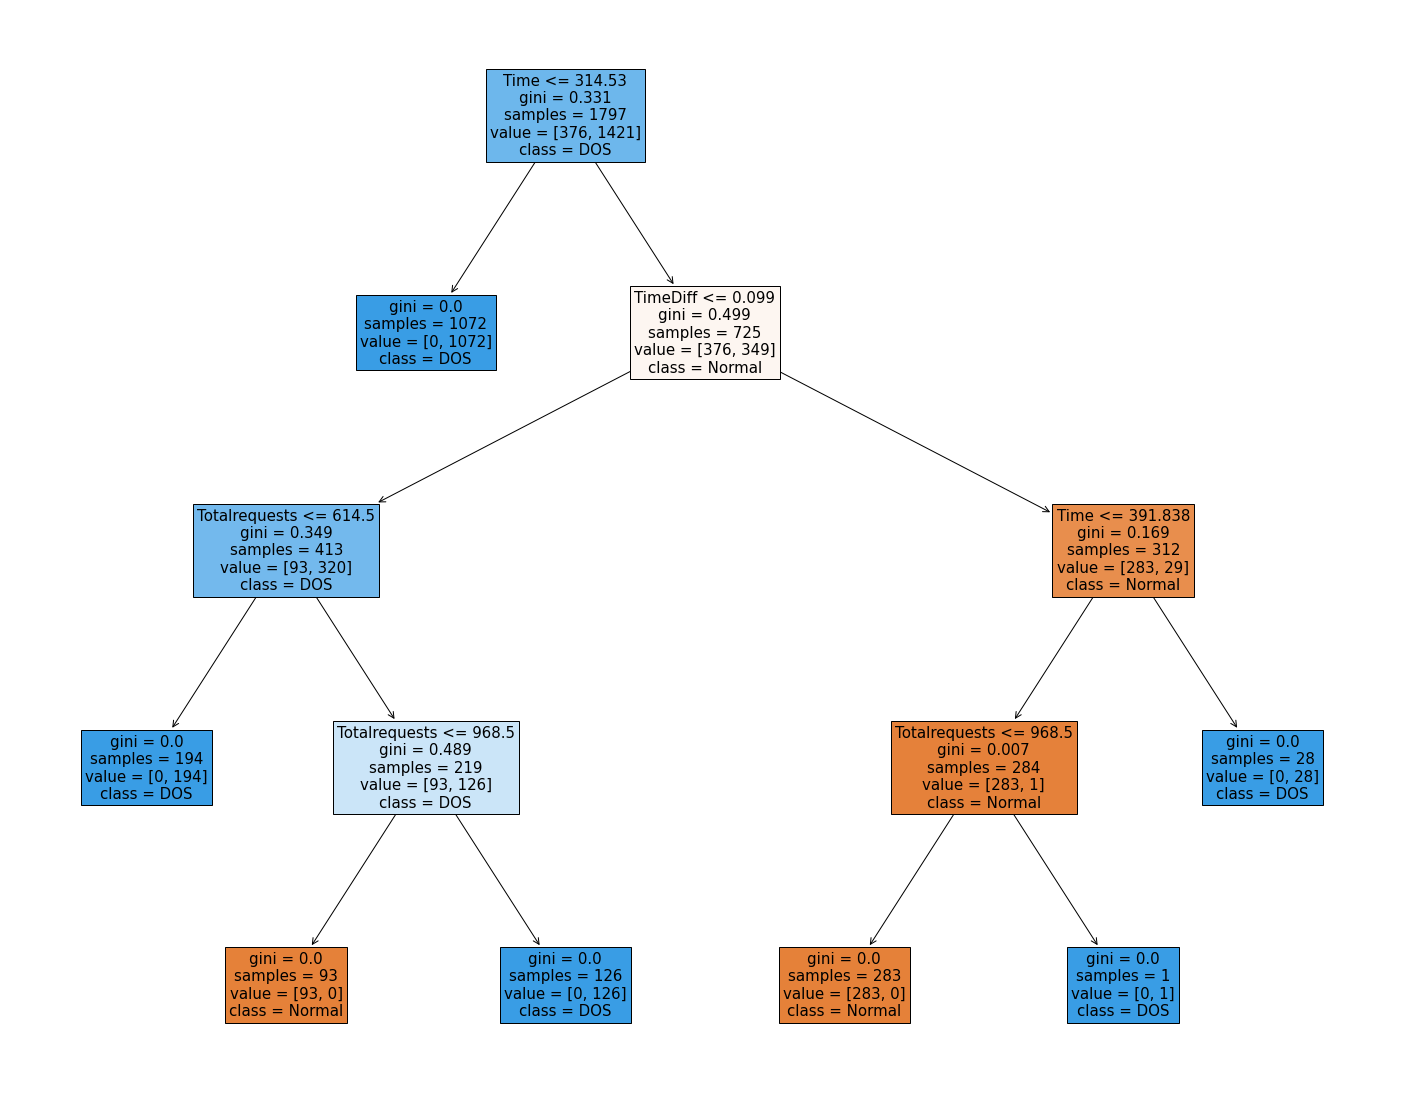

In [121]:
fig

# K MEANS CLUSTERING ON DOS ATTACK

In [65]:
df_Short = dfdos[['Time', 'TimeDiff', 'ProtocolNumber', 'Totalrequests', 'id']]
scale = MinMaxScaler()

scaled_dfdos = scale.fit_transform(df_Short)


In [66]:
#Function for Elbow Method
df_Short2 = scaled_dfdos

K= range(1,12)
wss = []
for k in K:
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans=kmeans.fit(df_Short2)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

C:\Users\donma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


In [67]:
#Viewing the WSS scores of the Clusters
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

Clusters          WSS
0          1  1723.536997
1          2  1053.245154
2          3   752.968732
3          4   594.084223
4          5   448.042004
5          6   375.003038
6          7   313.950129
7          8   277.834559
8          9   247.743913
9         10   216.020084
10        11   191.227079

<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

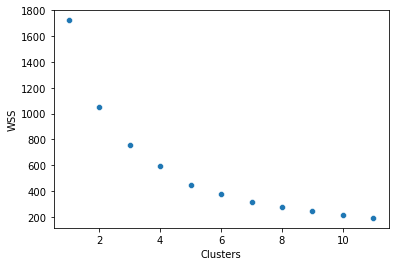

In [68]:
#Plot the Elbow 
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters,  marker = 'o')

In [69]:
km = KMeans(n_clusters=6)
y_predicted = km.fit_predict(scaled_dfdos)
y_predicted

array([0, 0, 5, ..., 3, 3, 5])

In [72]:
#CHECK DOS CLUSTER
dfdos['cluster']=y_predicted
#CHANGE CLUSTER VARIABLE TO FIND DOS CLUSTER
dfdoscheck = dfdos[dfdos.cluster==1]
dfdoscheck = dfdoscheck.sort_values(by=['Protocol'])
dfdoscheck = dfdoscheck.reset_index(drop=True)
dfdoscheck

Time         Source    Destination Protocol  Length                                               Info  TimeDiff  SPort  DPort ProtocolNumber  id  Totalrequests  cluster
0    314.479227  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=0/0, ttl=6...  0.292658      0      0              8  77            763        1
1    365.364920  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=63233/503,...  0.100478      0      0              8  77            763        1
2    365.466444  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=63489/504,...  0.101512      0      0              8  77            763        1
3    365.566934  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=63745/505,...  0.100478      0      0              8  77            763        1
4    365.667444  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=64001/506,...  0.036166      0      0              8  77            763        1
5    365.767983  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=64257/507,...  0.100529      0      0              8  77            763        1
6    365.868513  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=64513/508,...  0.100519      0      0              8  77            763        1
7    365.969053  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=64769/509,...  0.100527      0      0              8  77            763        1
8    366.069573  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=65025/510,...  0.061749      0      0              8  77            763        1
9    366.172049  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=65281/511,...  0.102465      0      0              8  77            763        1
10   366.275574  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=2/512, ttl...  0.103512      0      0              8  77            763        1
11   366.376063  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=258/513, t...  0.100477      0      0              8  77            763        1
12   366.476567  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=514/514, t...  0.100490      0      0              8  77            763        1
13   366.577084  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=770/515, t...  0.100505      0      0              8  77            763        1
14   366.679545  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=1026/516, ...  0.024374      0      0              8  77            763        1
15   366.780094  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=1282/517, ...  0.091241      0      0              8  77            763        1
16   366.880285  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=1538/518, ...  0.100180      0      0              8  77            763        1
17   366.981138  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=1794/519, ...  0.100840      0      0              8  77            763        1
18   367.083614  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=2050/520, ...  0.072454      0      0              8  77            763        1
19   367.184159  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=2306/521, ...  0.100536      0      0              8  77            763        1
20   365.264430  192.168.0.185  192.168.0.218     ICMP      60  Echo (ping) request  id=0xc628, seq=62977/502,...  0.102511      0      0              8  77            763        1
21   365.161907  192.168.0.18

# DECISION TREE 

In [48]:
dfdos['Attack'] = 'Normal'
dfdos.loc[dfdos['Protocol'] == 'ICMP', 'Attack'] = 'DOS'
from sklearn.model_selection import train_test_split
dt = dfdos[['Time', 'TimeDiff', 'Totalrequests']]
x = dt
y = dfdos['Attack']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5)

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [50]:
#CONFUSION MATRIX TEST DATA
predictions = clf.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=['Normal','DOS'])

array([[1421,    2],
       [   0,  375]], dtype=int64)

In [51]:
#TEST DATA ACCURACY
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9988876529477196

In [52]:
clf.feature_importances_

array([0.48575641, 0.27131244, 0.24293115])

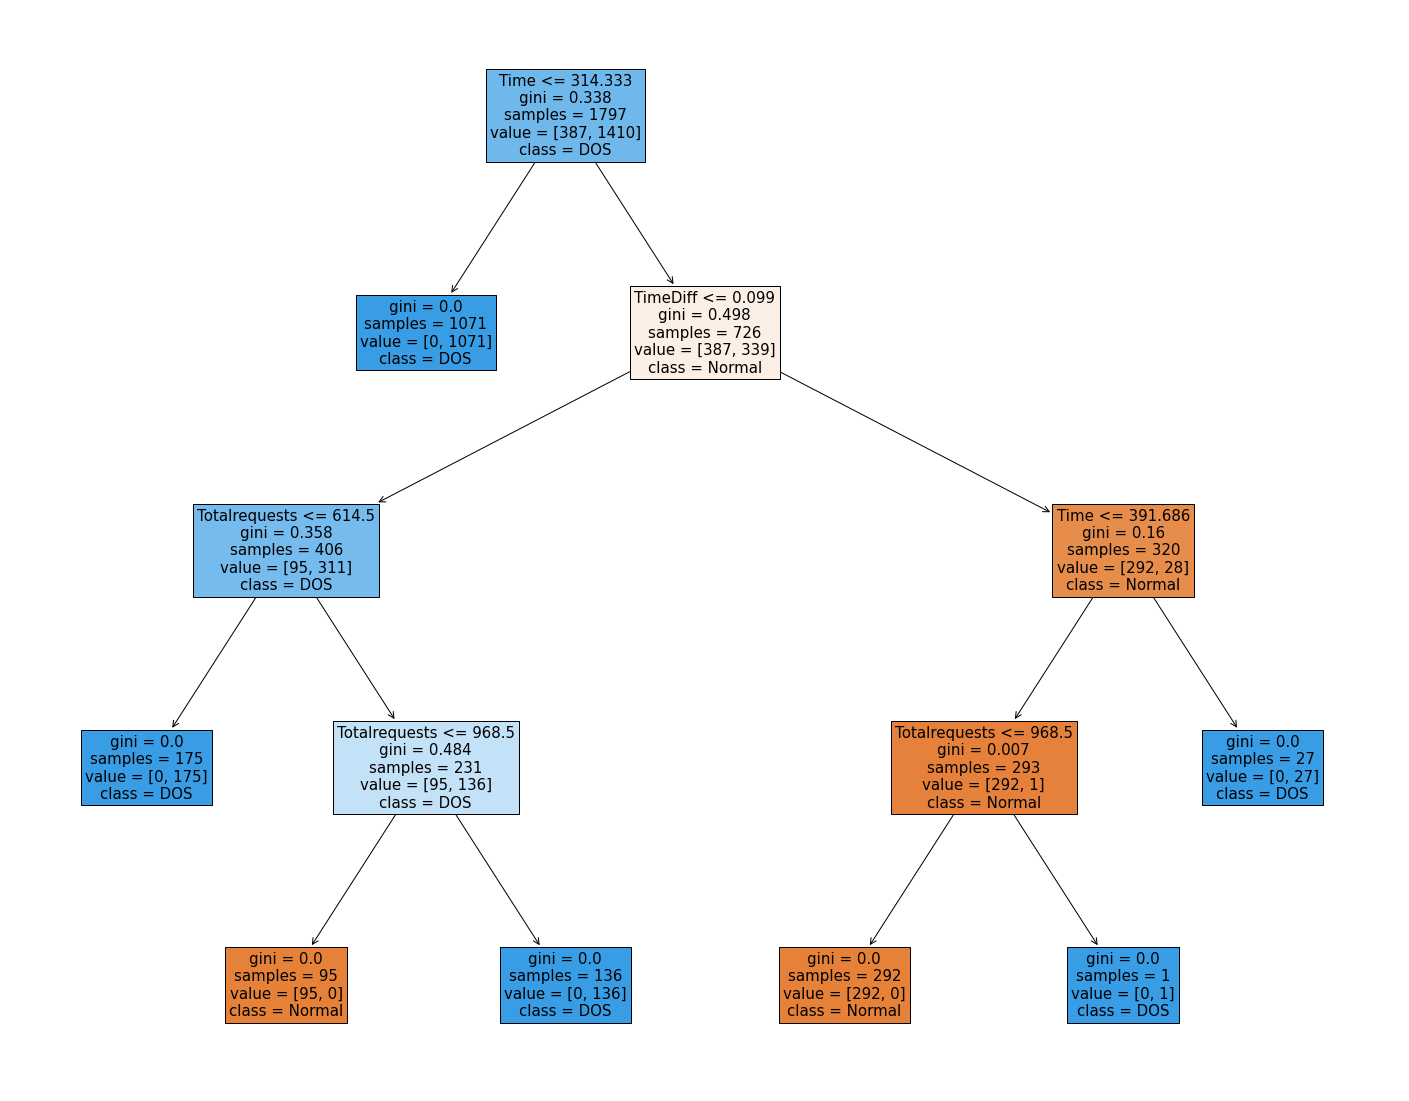

In [53]:
from sklearn import tree
feature_names = x.columns
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                  feature_names=feature_names,
                  class_names={0:'Normal', 1:'DOS'},
                  filled=True,
                  fontsize=15)

In [29]:
dtbartest = x_test
dtbartest['predicted'] = predictions
dtbartest['actual'] = dfdos['Attack']
dtbartest = dtbartest[dtbartest['actual'] != dtbartest['predicted']]
dtbartest

C:\Users\donma\AppData\Local\Temp/ipykernel_4136/646231892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtbartest['predicted'] = predictions
C:\Users\donma\AppData\Local\Temp/ipykernel_4136/646231892.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtbartest['actual'] = dfdos['Attack']


Time  TimeDiff  Totalrequests predicted  actual
3094  372.845267  0.098018              3       DOS  Normal
3422  392.530254  0.098879            466       DOS  Normal
3412  392.189306  0.178317             16       DOS  Normal
3423  393.008488  0.478234            466       DOS  Normal
2334  326.009601  0.096772            466       DOS  Normal
2609  342.008435  0.101262            466       DOS  Normal
3174  377.003044  0.100043              5       DOS  Normal
3411  392.010988  0.549164            466       DOS  Normal

# SQL INJECTION USING NAIVE BAYES

In [120]:
from datetime import datetime
import pytz
import re
import pandas as pd
pd.set_option("display.max_rows", None,'display.max_columns', None, 'display.width', 1000,
             "display.max_colwidth", 100)
data = pd.read_csv(
    'SQL',
    na_values='"-"',
    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
    usecols=[0, 3, 4, 5, 6, 7, 8],
    names=['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'],
    converters={'time': str,
                'request': str,
                'status': int,
                'size': int,
                'referer': str,
                'user_agent': str})

C:\Users\donma\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [121]:
#Converting Time to Int
remove_characters = ["-", ":",' ']
for character in remove_characters:
    data['time'] = data.time.str.replace(character, "")
data['time'] = data['time'].str[12:-6]
data['time'] = pd.to_numeric(data['time'])
data['request'] = data['request'].str[1:-1]
data['referer'] = data['referer'].str[1:-1]
data['user_agent'] = data['user_agent'].str[1:-1]

In [122]:
#Drop NAN values and Classify SQL Injection
data = data.dropna()
data['SQLInjection'] = 'No'
data.loc[42:3990, 'SQLInjection'] = 'Yes'
data

ip    time                                                                                              request  status  size                                                                                         referer                                                                                           user_agent SQLInjection
1     192.168.56.102  123008                                                                        GET /icons/blank.gif HTTP/1.1     200   431                                                                          http://192.168.56.101/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No
2     192.168.56.102  123009                                                                                  GET /DVWA/ HTTP/1.1     302   481                                                                          http://192.168.56.101/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No
3     192.168.56.102  123009                                                                         GET /DVWA/login.php HTTP/1.1     200   994                                                                          http://192.168.56.101/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No
4     192.168.56.102  123010                                                                        POST /DVWA/login.php HTTP/1.1     302   338                                                            http://192.168.56.101/DVWA/login.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No
5     192.168.56.102  123010                                                                         GET /DVWA/index.php HTTP/1.1     200  2895                                                            http://192.168.56.101/DVWA/login.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No
6     192.168.56.102  123010                                                         GET /dvwa/js/add_event_listeners.js HTTP/1.1     404   492                                                            http://192.168.56.101/DVWA/index.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No
7     192.168.56.102  123012                                                                      GET /DVWA/security.php HTTP/1.1     200  2407                                                            http://192.168.56.101/DVWA/index.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No
8     192.168.56.102  123012                                                         GET /dvwa/js/add_event_listeners.js HTTP/1.1     404   492                                                         http://192.168.56.101/DVWA/security.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No
9     192.168.56.102  123012                                                              GET /DVWA/dvwa/images/lock.png HTTP/1.1     200  1045                                                         http://192.168.56.101/DVWA/security.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No
10    192.168.56.102  123012                                                         GET /dvwa/js/add_event_listeners.js HTTP/1.1     404   492                                                         http://192.168.56.101/DVWA/security.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No
11    192.168.56.102  123014                                                                     POST /DVWA/security.php HTT

In [59]:
#number = data.loc[data['SQLInjection'] == 'No']
#number

In [92]:
data.dtypes

ip              object
time             int64
request         object
status           int64
size             int64
referer         object
user_agent      object
SQLInjection    object
dtype: object

In [93]:
data['Page'] = 0
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/sqli/', regex=False), 'Page'] = '1'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/brute/', regex=False), 'Page'] = '2'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/exec/', regex=False), 'Page'] = '3'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/csrf/', regex=False), 'Page'] = '4'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/upload/', regex=False), 'Page'] = '5'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/captcha/', regex=False), 'Page'] = '6'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/fi/', regex=False), 'Page'] = '7'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/javascript/', regex=False), 'Page'] = '8'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/csp/', regex=False), 'Page'] = '9'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/xss_s/', regex=False), 'Page'] = '10'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/xss_r/', regex=False), 'Page'] = '11'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/xss_d/', regex=False), 'Page'] = '12'
data['Page'] = pd.to_numeric(data['Page'])

In [94]:
data

ip    time                                                                                              request  status  size                                                                                              referer                                                                                           user_agent SQLInjection  Page
1    192.168.56.102  165003                                                                        GET /icons/blank.gif HTTP/1.1     200   431                                                                               http://192.168.56.101/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No     0
2    192.168.56.102  165004                                                                                  GET /DVWA/ HTTP/1.1     302   481                                                                               http://192.168.56.101/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No     0
3    192.168.56.102  165004                                                                         GET /DVWA/login.php HTTP/1.1     200   995                                                                               http://192.168.56.101/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No     0
4    192.168.56.102  165005                                                                        POST /DVWA/login.php HTTP/1.1     302   338                                                                 http://192.168.56.101/DVWA/login.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No     0
5    192.168.56.102  165005                                                                         GET /DVWA/index.php HTTP/1.1     200  2895                                                                 http://192.168.56.101/DVWA/login.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No     0
6    192.168.56.102  165005                                                         GET /dvwa/js/add_event_listeners.js HTTP/1.1     404   492                                                                 http://192.168.56.101/DVWA/index.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No     0
7    192.168.56.102  165007                                                            GET /DVWA/vulnerabilities/brute/ HTTP/1.1     200  1732                                                                 http://192.168.56.101/DVWA/index.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No     2
8    192.168.56.102  165007                                                             GET /DVWA/vulnerabilities/exec/ HTTP/1.1     200  1699                                                    http://192.168.56.101/DVWA/vulnerabilities/brute/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No     3
9    192.168.56.102  165008                                                             GET /DVWA/vulnerabilities/csrf/ HTTP/1.1     200  1879                                                     http://192.168.56.101/DVWA/vulnerabilities/exec/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No     4
10   192.168.56.102  165008                                              GET /DVWA/vulnerabilities/fi/?page=include.php HTTP/1.1     200  1698                                                     http://192.168.56.101/DVWA/vulnerabilities/csrf/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0           No     7
11   192.168.

In [95]:
data.dtypes

ip              object
time             int64
request         object
status           int64
size             int64
referer         object
user_agent      object
SQLInjection    object
Page             int64
dtype: object

In [64]:
from sklearn.model_selection import train_test_split
dt = data[['time', 'status', 'size', 'Page']]
x = dt
y = data['SQLInjection']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

In [65]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [66]:
model.score(x_test, y_test)

0.9887254901960785

In [67]:
x_test[:10]

time  status  size  Page
3211  124836     200  1632     1
2720  124733     200  1632     1
2462  124732     200  1632     1
1997  124731     200  1632     1
2587  124732     200  1632     1
1929  124730     200  1632     1
1218  124728     200  1632     1
163   124710     200  1632     1
3182  124734     200  1632     1
1249  124728     200  1632     1

In [68]:
y_test[:10]

3211    Yes
2720    Yes
2462    Yes
1997    Yes
2587    Yes
1929    Yes
1218    Yes
163     Yes
3182    Yes
1249    Yes
Name: SQLInjection, dtype: object

In [69]:
model.predict(x_test[:10])

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes'], dtype='<U3')

In [70]:
model.predict_proba(x_test[:10])

array([[9.32086404e-10, 9.99999999e-01],
       [1.76356690e-10, 1.00000000e+00],
       [1.77936276e-10, 1.00000000e+00],
       [1.79616623e-10, 1.00000000e+00],
       [1.77936276e-10, 1.00000000e+00],
       [1.81400312e-10, 1.00000000e+00],
       [1.85288923e-10, 1.00000000e+00],
       [2.44600556e-10, 1.00000000e+00],
       [1.74875454e-10, 1.00000000e+00],
       [1.85288923e-10, 1.00000000e+00]])

In [71]:
from sklearn.metrics import confusion_matrix
prediction = model.predict(x_test)
confusion_matrix(y_test, prediction, labels =['Yes','No'])

array([[1958,   23],
       [   0,   59]], dtype=int64)

In [72]:
finaltest = x_test
finaltest['Predicted'] = prediction
finaltest['Actual'] = y_test
wrongpredict = finaltest[finaltest['Predicted'] != finaltest['Actual']]
wrongpredict

C:\Users\donma\AppData\Local\Temp/ipykernel_4136/2229342613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaltest['Predicted'] = prediction
C:\Users\donma\AppData\Local\Temp/ipykernel_4136/2229342613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaltest['Actual'] = y_test


time  status  size  Page Predicted Actual
67    124710     200   490     1        No    Yes
3985  124933     200   332     1        No    Yes
83    124710     200   509     1        No    Yes
149   124710     200   488     1        No    Yes
162   124710     200   340     1        No    Yes
154   124710     200   430     1        No    Yes
106   124710     200   488     1        No    Yes
80    124710     200   507     1        No    Yes
176   124720     200   326     1        No    Yes
3989  125025     200   332     1        No    Yes
164   124710     200   488     1        No    Yes
166   124710     200   505     1        No    Yes
3987  125025     200   332     1        No    Yes
3981  124933     200   332     1        No    Yes
157   124710     200   330     1        No    Yes
68    124710     200   487     1        No    Yes
128   124710     200   509     1        No    Yes
62    124710     200   486     1        No    Yes
174   124720     200   329     1        No    Yes
46    124634     200   480     1        No    Yes
121   124710     200   482     1        No    Yes
165   124710     200   493     1        No    Yes
69    124710     200   490     1        No    Yes

# Brute Force Attack USING NAIVE BAYES

In [70]:
from datetime import datetime
import pytz
import re
import pandas as pd
pd.set_option("display.max_rows", None,'display.max_columns', None, 'display.width', 1000,
             "display.max_colwidth", 100)
data = pd.read_csv(
    'Brute.log',
    na_values='"-"',
    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
    usecols=[0, 3, 4, 5, 6, 7, 8],
    names=['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'],
    converters={'time': str,
                'request': str,
                'status': int,
                'size': int,
                'referer': str,
                'user_agent': str})

C:\Users\donma\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [71]:
#Converting Time to Int
remove_characters = ["-", ":",' ']
for character in remove_characters:
    data['time'] = data.time.str.replace(character, "")
data['time'] = data['time'].str[12:-6]
data['time'] = pd.to_numeric(data['time'])
data['request'] = data['request'].str[1:-1]
data['referer'] = data['referer'].str[1:-1]
data['user_agent'] = data['user_agent'].str[1:-1]

In [72]:
#Drop NAN values and Classify Brute Force
data = data.dropna()
data['Brute'] = 'No'
data.loc[136:209, 'Brute'] = 'Yes'
data

ip    time                                                                                              request  status  size                                                                                              referer                                                                                           user_agent Brute
1    192.168.56.102  165003                                                                        GET /icons/blank.gif HTTP/1.1     200   431                                                                               http://192.168.56.101/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No
2    192.168.56.102  165004                                                                                  GET /DVWA/ HTTP/1.1     302   481                                                                               http://192.168.56.101/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No
3    192.168.56.102  165004                                                                         GET /DVWA/login.php HTTP/1.1     200   995                                                                               http://192.168.56.101/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No
4    192.168.56.102  165005                                                                        POST /DVWA/login.php HTTP/1.1     302   338                                                                 http://192.168.56.101/DVWA/login.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No
5    192.168.56.102  165005                                                                         GET /DVWA/index.php HTTP/1.1     200  2895                                                                 http://192.168.56.101/DVWA/login.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No
6    192.168.56.102  165005                                                         GET /dvwa/js/add_event_listeners.js HTTP/1.1     404   492                                                                 http://192.168.56.101/DVWA/index.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No
7    192.168.56.102  165007                                                            GET /DVWA/vulnerabilities/brute/ HTTP/1.1     200  1732                                                                 http://192.168.56.101/DVWA/index.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No
8    192.168.56.102  165007                                                             GET /DVWA/vulnerabilities/exec/ HTTP/1.1     200  1699                                                    http://192.168.56.101/DVWA/vulnerabilities/brute/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No
9    192.168.56.102  165008                                                             GET /DVWA/vulnerabilities/csrf/ HTTP/1.1     200  1879                                                     http://192.168.56.101/DVWA/vulnerabilities/exec/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No
10   192.168.56.102  165008                                              GET /DVWA/vulnerabilities/fi/?page=include.php HTTP/1.1     200  1698                                                     http://192.168.56.101/DVWA/vulnerabilities/csrf/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No
11   192.168.56.102  165010                                                       GET /DVWA/vulnerabilities/javascript/ HTTP/1.1     200  3572              

In [73]:
data['Page'] = 0
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/sqli/', regex=False), 'Page'] = '1'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/brute/', regex=False), 'Page'] = '2'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/exec/', regex=False), 'Page'] = '3'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/csrf/', regex=False), 'Page'] = '4'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/upload/', regex=False), 'Page'] = '5'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/captcha/', regex=False), 'Page'] = '6'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/fi/', regex=False), 'Page'] = '7'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/javascript/', regex=False), 'Page'] = '8'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/csp/', regex=False), 'Page'] = '9'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/xss_s/', regex=False), 'Page'] = '10'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/xss_r/', regex=False), 'Page'] = '11'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/xss_d/', regex=False), 'Page'] = '12'
data['Page'] = pd.to_numeric(data['Page'])

In [74]:
data['Attempts'] = data.groupby('referer').ngroup()
data['Attempts'] = data.groupby('referer')['referer'].transform('count')
data

ip    time                                                                                              request  status  size                                                                                              referer                                                                                           user_agent Brute  Page  Attempts
1    192.168.56.102  165003                                                                        GET /icons/blank.gif HTTP/1.1     200   431                                                                               http://192.168.56.101/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No     0         9
2    192.168.56.102  165004                                                                                  GET /DVWA/ HTTP/1.1     302   481                                                                               http://192.168.56.101/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No     0         9
3    192.168.56.102  165004                                                                         GET /DVWA/login.php HTTP/1.1     200   995                                                                               http://192.168.56.101/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No     0         9
4    192.168.56.102  165005                                                                        POST /DVWA/login.php HTTP/1.1     302   338                                                                 http://192.168.56.101/DVWA/login.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No     0         6
5    192.168.56.102  165005                                                                         GET /DVWA/index.php HTTP/1.1     200  2895                                                                 http://192.168.56.101/DVWA/login.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No     0         6
6    192.168.56.102  165005                                                         GET /dvwa/js/add_event_listeners.js HTTP/1.1     404   492                                                                 http://192.168.56.101/DVWA/index.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No     0         6
7    192.168.56.102  165007                                                            GET /DVWA/vulnerabilities/brute/ HTTP/1.1     200  1732                                                                 http://192.168.56.101/DVWA/index.php                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No     2         6
8    192.168.56.102  165007                                                             GET /DVWA/vulnerabilities/exec/ HTTP/1.1     200  1699                                                    http://192.168.56.101/DVWA/vulnerabilities/brute/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No     3        17
9    192.168.56.102  165008                                                             GET /DVWA/vulnerabilities/csrf/ HTTP/1.1     200  1879                                                     http://192.168.56.101/DVWA/vulnerabilities/exec/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0    No     4        15
10   192.168.56.102  165008                                              GET /DVWA/vulnerabilities/fi/?page=include.php HTTP/1.1     200  1698                                                     http://192.168.56.101/DVWA/vulnerabilities/csrf/                                 Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0   

In [75]:
data.dtypes

ip            object
time           int64
request       object
status         int64
size           int64
referer       object
user_agent    object
Brute         object
Page           int64
Attempts       int64
dtype: object

In [76]:
from sklearn.model_selection import train_test_split
dt = data[['time', 'Attempts', 'Page']]
x = dt
y = data['Brute']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

In [77]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [78]:
model.fit(x_train, y_train)

GaussianNB()

In [79]:
model.score(x_test, y_test)

1.0

In [80]:
x_test[:10]

time  Attempts  Page
89   165502         9     0
21   165021         5     5
136  170046        74     2
115  165524        10     0
137  170400        74     2
231  170738         8     5
18   165017         5     0
240  170809         7     0
80   165321         8     4
125  165651         1     2

In [81]:
y_test[:10]

89      No
21      No
136    Yes
115     No
137    Yes
231     No
18      No
240     No
80      No
125     No
Name: Brute, dtype: object

In [82]:
model.predict(x_test[:10])

array(['No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No'],
      dtype='<U3')

In [83]:
model.predict_proba(x_test[:10])

array([[1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [7.60275602e-34, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [3.38099212e-44, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00]])

In [84]:
from sklearn.metrics import confusion_matrix
prediction = model.predict(x_test)
confusion_matrix(y_test, prediction, labels =['Yes','No'])

array([[33,  0],
       [ 0, 89]], dtype=int64)

In [85]:
finaltest = x_test
finaltest['Predicted'] = prediction
finaltest['Actual'] = y_test
wrongpredict = finaltest[finaltest['Predicted'] != finaltest['Actual']]
wrongpredict

C:\Users\donma\AppData\Local\Temp/ipykernel_4988/2229342613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaltest['Predicted'] = prediction
C:\Users\donma\AppData\Local\Temp/ipykernel_4988/2229342613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaltest['Actual'] = y_test


Empty DataFrame
Columns: [time, Attempts, Page, Predicted, Actual]
Index: []

# XSS Reflected

In [104]:
from datetime import datetime
import pytz
import re
import pandas as pd
pd.set_option("display.max_rows", None,'display.max_columns', None, 'display.width', 1000,
             "display.max_colwidth", 100)
data = pd.read_csv(
    'XSS.log',
    na_values='"-"',
    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
    usecols=[0, 3, 4, 5, 6, 7, 8],
    names=['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'],
    converters={'time': str,
                'request': str,
                'status': int,
                'size': int,
                'referer': str,
                'user_agent': str})

C:\Users\donma\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [105]:
#Converting Time to Int
remove_characters = ["-", ":",' ']
for character in remove_characters:
    data['time'] = data.time.str.replace(character, "")
data['time'] = data['time'].str[12:-6]
data['time'] = pd.to_numeric(data['time'])
data['request'] = data['request'].str[1:-1]
data['referer'] = data['referer'].str[1:-1]
data['user_agent'] = data['user_agent'].str[1:-1]

In [106]:
#Drop NAN values and Classify SQL Injection
data = data.dropna()
data['XSS'] = 'No'
data.loc[data['request'].str.contains('script%', regex=False), 'XSS'] = 'Yes'
data['Page'] = 0
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/sqli/', regex=False), 'Page'] = '1'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/brute/', regex=False), 'Page'] = '2'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/exec/', regex=False), 'Page'] = '3'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/csrf/', regex=False), 'Page'] = '4'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/upload/', regex=False), 'Page'] = '5'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/captcha/', regex=False), 'Page'] = '6'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/fi/', regex=False), 'Page'] = '7'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/javascript/', regex=False), 'Page'] = '8'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/csp/', regex=False), 'Page'] = '9'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/xss_s/', regex=False), 'Page'] = '10'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/xss_r/', regex=False), 'Page'] = '11'
data.loc[data['request'].str.contains('/DVWA/vulnerabilities/xss_d/', regex=False), 'Page'] = '12'
data['Page'] = pd.to_numeric(data['Page'])
data

ip   time                                                                                              request  status  size                                                                                              referer                                                            user_agent  XSS  Page
1    192.168.56.102  93039                                                                                  GET /DVWA/ HTTP/1.1     302   480                                                                               http://192.168.56.101/  Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0   No     0
2    192.168.56.102  93039                                                                         GET /DVWA/login.php HTTP/1.1     200   993                                                                               http://192.168.56.101/  Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0   No     0
3    192.168.56.102  93039                                                                GET /DVWA/dvwa/css/login.css HTTP/1.1     200   741                                                                 http://192.168.56.101/DVWA/login.php  Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0   No     0
4    192.168.56.102  93039                                                        GET /DVWA/dvwa/images/login_logo.png HTTP/1.1     304   181                                                                 http://192.168.56.101/DVWA/login.php  Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0   No     0
5    192.168.56.102  93041                                                                        POST /DVWA/login.php HTTP/1.1     302   338                                                                 http://192.168.56.101/DVWA/login.php  Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0   No     0
6    192.168.56.102  93041                                                                         GET /DVWA/index.php HTTP/1.1     200  2895                                                                 http://192.168.56.101/DVWA/login.php  Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0   No     0
7    192.168.56.102  93041                                                               GET /DVWA/dvwa/js/dvwaPage.js HTTP/1.1     200   816                                                                 http://192.168.56.101/DVWA/index.php  Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0   No     0
8    192.168.56.102  93041                                                                 GET /DVWA/dvwa/css/main.css HTTP/1.1     200  1445                                                                 http://192.168.56.101/DVWA/index.php  Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0   No     0
9    192.168.56.102  93041                                                              GET /DVWA/dvwa/images/logo.png HTTP/1.1     304   181                                                                 http://192.168.56.101/DVWA/index.php  Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0   No     0
10   192.168.56.102  93041                                                         GET /dvwa/js/add_event_listeners.js HTTP/1.1     404   492                                                                 http://192.168.56.101/DVWA/index.php  Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0   No     0
11   192.168.56.102  93136                                                            GET /DVWA/vulnerabilities/brute/ HTTP/1.1     200  1733                                                                 http://192.168.56.101/DVWA/index.php  Mozilla/5.0 (X11; Linux x86_64; rv:91.0) Gecko/20100101 Firefox/91.0   No     2
12   192.168.56.102  93136                                                   GET /DVWA//dvwa/js/add_event_listeners.js HTTP/1.1  

In [107]:
from sklearn.model_selection import train_test_split
dt = data[['time', 'size']]
x = dt
y = data['XSS']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5)

In [108]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [109]:
#CONFUSION MATRIX TEST DATA
predictions = clf.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=['Yes','No'])

array([[ 3,  4],
       [ 1, 57]], dtype=int64)

In [110]:
#TEST DATA ACCURACY
predictions = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9230769230769231

In [111]:
feature_names = x.columns
feature_names

Index(['time', 'size'], dtype='object')

In [112]:
clf.feature_importances_

array([0.4921875, 0.5078125])

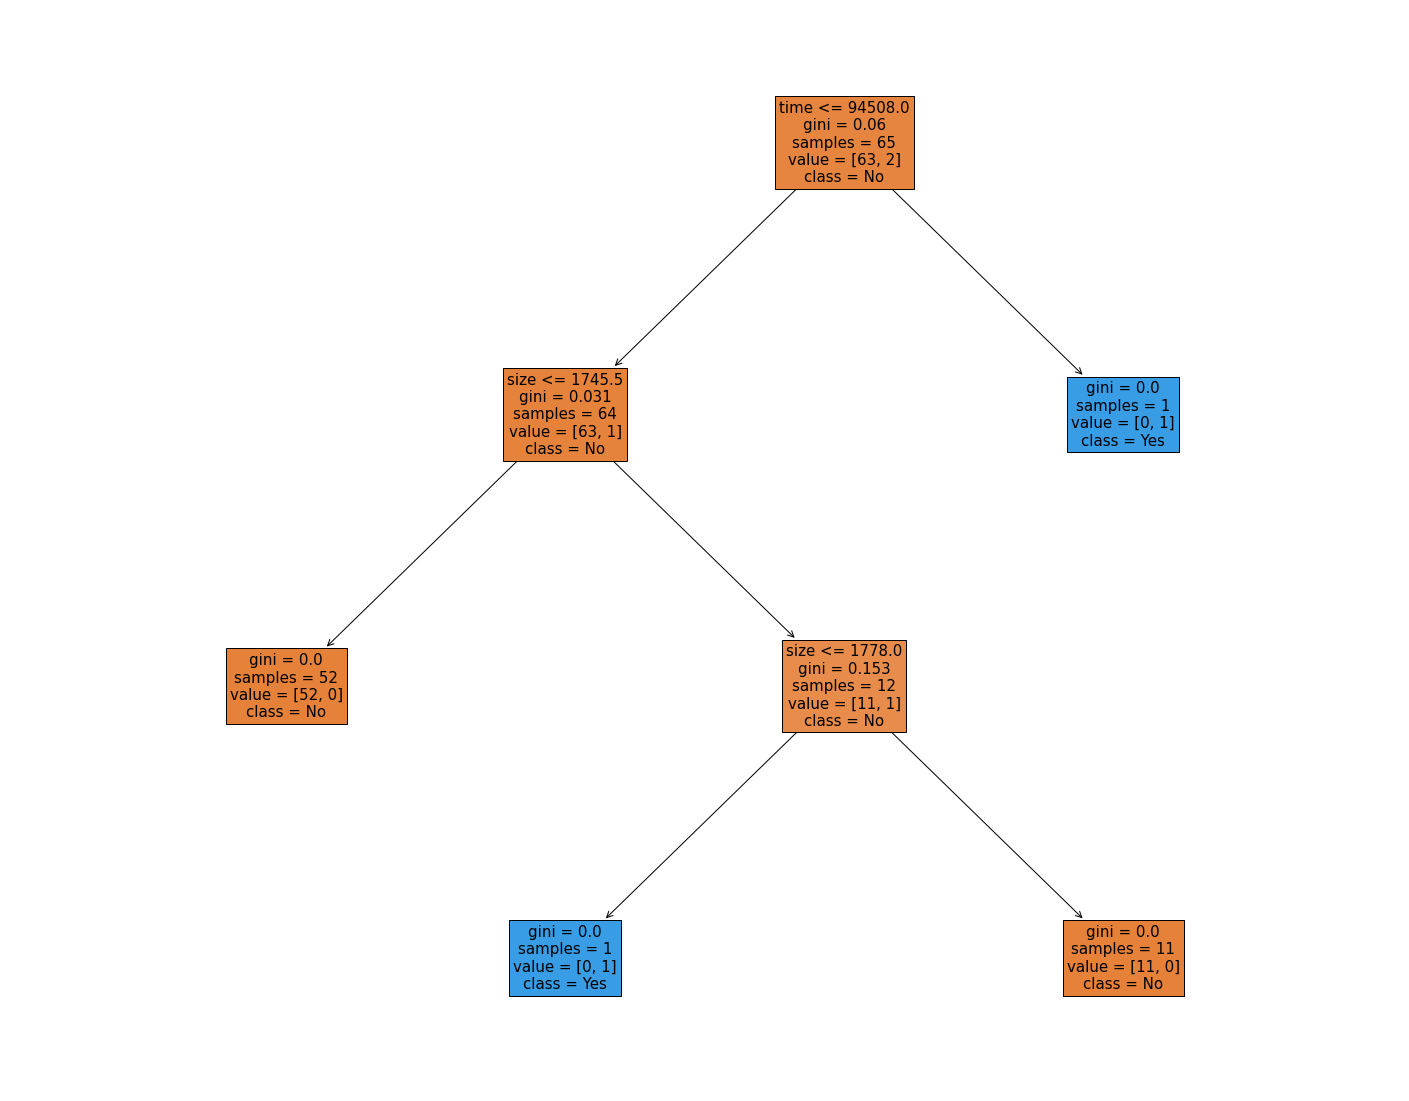

In [113]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                  feature_names=feature_names,
                  class_names={0:'No', 1:'Yes'},
                  filled=True,
                  fontsize=15)